$$ R_{t, t+1} = \frac{P_{t+1}-P_{t}}{P_{t}} $$

or alternately

$$ R_{t, t+1} = \frac{P_{t+1}}{P_{t}} -1 $$

In [1]:
prices_a_list = [8.70, 8.91, 8.71]
(prices_a_list[1] / prices_a_list[0]) - 1

0.024137931034482918

In [2]:
import numpy as np

prices_a_array = np.array(prices_a_list)

In [6]:
(prices_a_array[1:] / prices_a_array[:-1]) - 1 

array([ 0.02413793, -0.02244669])

In [10]:
import pandas as pd 

prices_a_df = pd.DataFrame(
    {
        "BLUE":   [8.70,  8.91,  8.71,  8.43,  8.73],
        "ORANGE": [10.66, 11.08, 10.71, 11.59, 12.11]
    }
)
prices_a_df

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [12]:
prices_a_df.iloc[1:]

,BLUE,ORANGE
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [13]:
prices_a_df.iloc[:-1]

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59


In [19]:
prices_a_df.iloc[1:].div(prices_a_df.iloc[:-1].values).sub(1)

,BLUE,ORANGE
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [20]:
prices_a_df

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [21]:
prices_a_df.shift(1)

,BLUE,ORANGE
0,NaN,NaN
1,8.70,10.66
2,8.91,11.08
3,8.71,10.71
4,8.43,11.59


In [22]:
prices_a_df.div(prices_a_df.shift(1)).sub(1)

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [23]:
prices_a_df.pct_change()

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [24]:
prices_df = pd.read_csv("../data/sample_prices.csv")
prices_df

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [25]:
returns_df = prices_df.pct_change()
returns_df

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


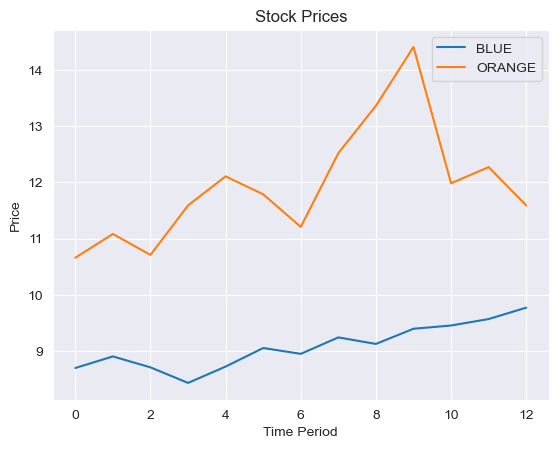

In [30]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style("darkgrid")

prices_df.plot()
plt.title("Stock Prices")
plt.xlabel("Time Period")
plt.ylabel("Price")
plt.grid(True)

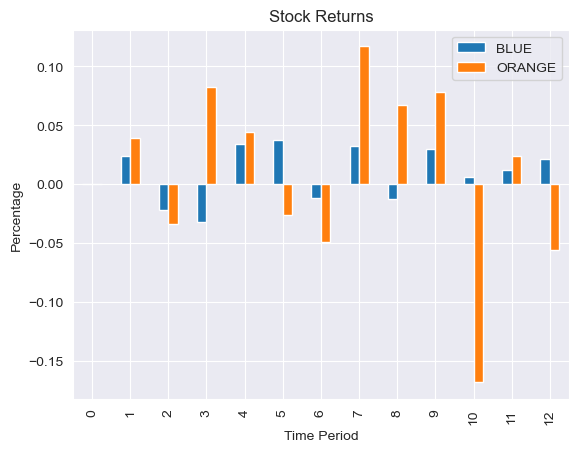

In [31]:
returns_df.plot.bar()
plt.title("Stock Returns")
plt.xlabel("Time Period")
plt.ylabel("Percentage")
plt.grid(True)

In [32]:
returns_df.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [33]:
returns_df.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

In [34]:
returns_df

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [35]:
returns_df.add(1)

,BLUE,ORANGE
0,NaN,NaN
1,1.023621,1.039662
2,0.978193,0.966362
3,0.968237,1.082232
4,1.034477,1.044544
5,1.037786,0.973619
6,0.988548,0.950813
7,1.032676,1.117008
8,0.987419,1.067353
9,1.029581,1.078249


In [36]:
np.prod(returns_df.add(1))

BLUE      1.123310
ORANGE    1.087167
dtype: float64

In [38]:
np.prod(returns_df.add(1)).sub(1)

BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [39]:
returns_df.add(1).prod().sub(1)

BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [40]:
returns_df.add(1).prod().sub(1).mul(100)

BLUE      12.331034
ORANGE     8.716698
dtype: float64

## Annualization

In [42]:
monthly_return = 0.01
((1 + monthly_return) ** 12) - 1

0.12682503013196977

In [43]:
quarterly_return = 0.04
((1 + quarterly_return) ** 4) - 1

0.1698585600000002

In [ ]:
daily_return = 0.0001
(1 + daily_return) ** 252